In [10]:
# organize imports
from __future__ import print_function

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import numpy as np
import h5py
import os
import json
import pickle
import seaborn as sns
import matplotlib.pyplot as plt



# config variables
weights 		= 'imagenet'

features_path 	= 'features.npy'
labels_path = 'Flower102_label.npy'
test_size 		= 0.2
results 		= 'results.txt'
model_path 		= 'model'
seed 			= 42

classifier_path = 'classfier.pickle'


# import features and labels


features =np.load(features_path)
labels   =np.load(labels_path)

# verify the shape of features and labels
print ("[INFO] features shape: {}".format(features.shape))
print ("[INFO] labels shape: {}".format(labels.shape))

print ("[INFO] training started...")
# split the training and testing data
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(features),
                                                                  np.array(labels),
                                                                  test_size=test_size,
                                                                  random_state=seed)

print ("[INFO] splitted train and test data...")
print ("[INFO] train data  : {}".format(trainData.shape))
print ("[INFO] test data   : {}".format(testData.shape))
print ("[INFO] train labels: {}".format(trainLabels.shape))
print ("[INFO] test labels : {}".format(testLabels.shape))

# use logistic regression as the model
print ("[INFO] creating model...")
###################################################################################33
clf = SVC(gamma='auto', decision_function_shape='ovo',probability=True)
clf.fit(trainData, trainLabels)

model=clf
###############################################################################################


[INFO] features shape: (8189, 2048)
[INFO] labels shape: (8189,)
[INFO] training started...
[INFO] splitted train and test data...
[INFO] train data  : (6551, 2048)
[INFO] test data   : (1638, 2048)
[INFO] train labels: (6551,)
[INFO] test labels : (1638,)
[INFO] creating model...


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


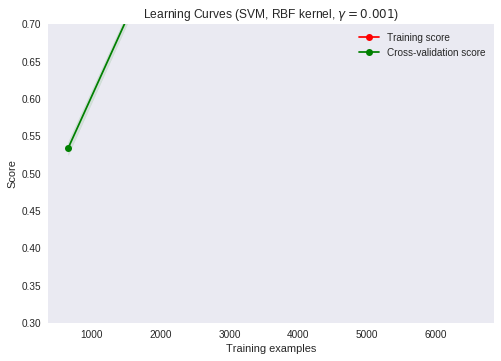

In [0]:
from sklearn.metrics import accuracy_score
ypred=model.predict(testData)
ytest=testLabels
accuracy_score(ytest, ypred)

In [4]:
# use rank-1 and rank-5 predictions
print ("[INFO] evaluating model...")
f = open('results.txt', "w")


# evaluate the model of test data
preds = model.predict(testData)

# write the classification report to file
f.write("{}\n".format(classification_report(testLabels, preds)))
f.close()

# dump classifier to file
print ("[INFO] saving model...")
pickle.dump(model, open(classifier_path, 'wb'))

# display the confusion matrix
print ("[INFO] confusion matrix")

# get the list of training lables



[INFO] evaluating model...
[INFO] saving model...
[INFO] confusion matrix


In [0]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
y_score = model.decision_function(testData)


In [27]:
np.shape(y_score)

(1638, 5151)

In [26]:

# Load dataset and encode categorical variables
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(testLabels)):
    precision[i], recall[i], _ = precision_recall_curve(testLabels[i], y_score[:, i])
    average_precision[i] = average_precision_score(testLabelst[i], y_score[:, i])
precision["micro"], recall["micro"], _ = precision_recall_curve(testLabels.ravel(),y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

TypeError: ignored

Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes')

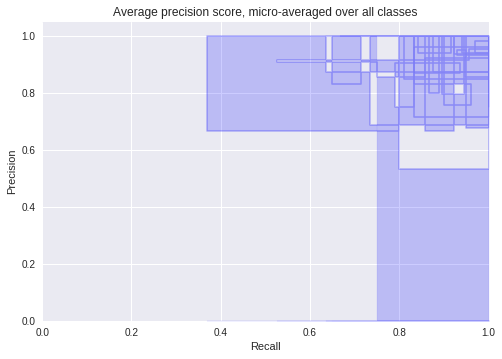

In [39]:
from sklearn.utils.fixes import signature
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.figure()
plt.step(pp, gg, color='b', alpha=0.2,
         where='post')

plt.fill_between(pp,gg, alpha=0.2, color='b',
                 **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes')

In [0]:
ypred=model.predict(testData)


In [0]:
from sklearn.metrics import precision_score
gg=precision_score(testLabels, ypred, average=None)

In [0]:
 from sklearn.metrics import recall_score
 pp=recall_score(testLabels, ypred, average=None)

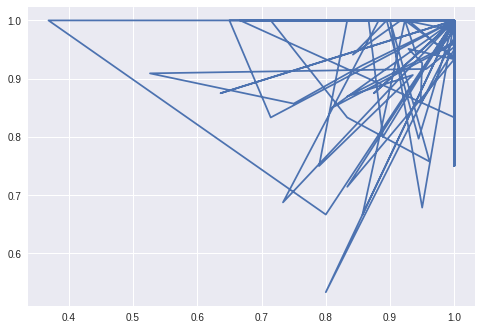

In [40]:
plt.plot(pp,gg)
plt.show()